# What makes a Youtube Video trendy ?

How to make it to the trends. Quality ? Views ? Something else ?

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


I'll only be working with US videos.

In [8]:
data = pd.read_csv('..\\Documents\\Ryan\\dataProjects\\youtubeDataset\\USvideos.csv')
print(data.columns)

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')


### Data Cleaning

In [9]:
## -- Checking for nan
print(data.isnull().sum(axis=0).to_string())

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570


Some descriptions are missing, but it's fine, I don't intend to use it for now. 

In [10]:
## -- Deleting entries with ratings disabled or video error
disabledIdx = np.union1d(np.where(data['ratings_disabled'])[0],np.where(data['video_error_or_removed'])[0])
data = data.drop(disabledIdx,axis=0)
data = data.drop(['ratings_disabled','video_error_or_removed'],axis = 1)
print('Proportion of lines deleted %f' %(len(disabledIdx)/data.shape[0]))

Proportion of lines deleted 0.004711


In [11]:
## -- Same video can appear in the dataset more than once
print(data.groupby(['video_id']).size().head(7).to_string())
print('\n On average, a video appears %i times in the dataset'%int(data.groupby(['video_id']).size().mean()))

video_id
-0CMnp02rNY    6
-0NYY8cqdiQ    1
-1Hm41N0dUs    3
-1yT-K3c6YI    4
-2RVw2_QyxQ    3
-2aVkGcI7ZA    4
-2b4qSoMnKE    2

 On average, a video appears 6 times in the dataset


I chose not to delete the videos that appear multiple times in the dataset

### New intensive variables

In [12]:
## -- Engagement. Shows if you video has fostered a lot of reactions. 
alpha = 5 
data['engagementRate'] = (data['likes'] + data['dislikes'] + data['comment_count']*alpha) / ((2+alpha)*data['views']) #Comments value more than likes when it comes to commitment. 
print(data.columns)

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'description', 'engagementRate'],
      dtype='object')


In [13]:
## -- Quality. Shows how well was your video received
data['qualityScore'] = data['likes']/ (data['likes']+data['dislikes'])
print(data.columns)

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'description', 'engagementRate',
       'qualityScore'],
      dtype='object')


In [14]:
## -- LogViews
data['logViews'] = np.log(data['views'])
print(data.columns)

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'description', 'engagementRate',
       'qualityScore', 'logViews'],
      dtype='object')


## Exploratory Data Analysis : views aren't enough

0          748374
1         2418783
2         3191434
3          343168
4         2095731
           ...   
40944     1685609
40945     1064798
40946     1066451
40947     5660813
40948    10306119
Name: views, Length: 40757, dtype: int64
mean: 2353868
std: 7373859
min: 549


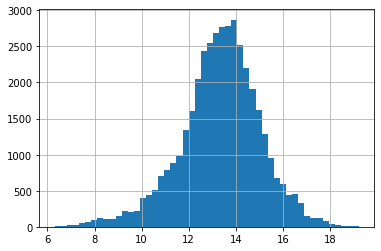

In [15]:
## -- Views
data['logViews'].hist(bins = 50)
mean = data['views'].mean()
std = data['views'].std()
print(data['views'])
print('mean: %i' %int(mean))
print('std: %i' %int(std))
print('min: %i' %min(data['views']))

In [16]:
print('First Quantile: %i' %int(data['views'].quantile(0.1)))

First Quantile: 71254


High range of values (std / mean ~ 3). Not visible in the histogram of 'views' because of some outliers of very high value, hence the log transform. The number of views alone isn't enough to know wether or not a video can make it to the trends. As shown right above, the dispersion is important, with, in fact, a lot of videos with quite a low amount of views. **10% of the videos that make it to the trends have less than 70,000 views**.

0        0.026775
1        0.009854
2        0.008607
3        0.008979
4        0.015120
           ...   
40944    0.004477
40945    0.010742
40946    0.009251
40947    0.006593
40948    0.017937
Name: engagementRate, Length: 40757, dtype: float64
mean: 0.008357
std: 0.006823


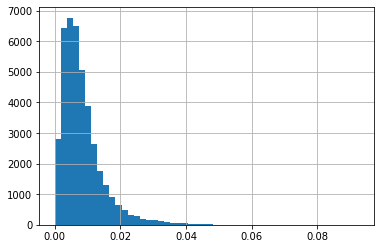

In [17]:
 ## -- Engagement
data['engagementRate'].hist(bins = 50)
mean = data['engagementRate'].mean()
std = data['engagementRate'].std()
print(data['engagementRate'])
print('mean: %f' %mean)
print('std: %f' %std)

As it is, this data can't be exploited. It would be interesting to compare it against a set of random youtube videos.

0        0.950970
1        0.940521
2        0.964729
3        0.938550
4        0.985181
           ...   
40944    0.964977
40945    0.993674
40946    0.978982
40947    0.985465
40948    0.626394
Name: qualityScore, Length: 40757, dtype: float64
mean: 0.933124
std: 0.102273


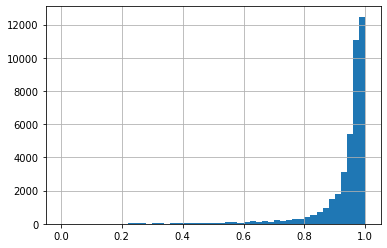

In [18]:
## -- Quality
data['qualityScore'].hist(bins = 50)
mean = data['qualityScore'].mean()
std = data['qualityScore'].std()
print(data['qualityScore'])
print('mean: %f' %mean)
print('std: %f' %std)

**Results**

With $\sigma$ the standard deviation, and $\mu$ the mean, we have:
$$\frac{\sigma}{\mu} =  \frac{1}{10}$$ 
The data are regrouped close to the average, aside from some outliers the quality score is above 90%



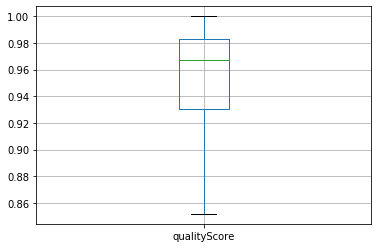

In [19]:
## This phenomenon is more visible on the box plot of the statistical series.
plt.show(data.boxplot('qualityScore',showfliers=False)) #outliers not shown


**Conclusion**

This means that if the ratio $\frac{likes}{likes + dislikes}$ of your video isn't around 90% or above, it'll be all the more difficult for you to make it to the trends. If this ratio is less than 85%, your chances to make it are slim to none. 
Therefore, your primary concern should always be **quality**, and not **buzz**.

**Note**

Making this analysis, I took a look at the like/dislike ratio of youtube videos. If not all videos have a lot of likes (https://en.wikipedia.org/wiki/List_of_most-disliked_YouTube_videos) youtube tends to recommend me those with a high like/dislike ratio. Not only videos with a lot of dislikes don't make it to the trends, but they become **invisible**. It could explain the high correlation between the number of views and the number of likes compared to the correlation between the number of views and the number of dislikes. The videos that do have a good ratio get recommended and therefore get more views.

In [20]:
## -- correlation between likes views and dislikes
data[['views','likes','dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.853981,0.474756
likes,0.853981,1.000000,0.447132
dislikes,0.474756,0.447132,1.000000


### Clickbait techniques

Let's check if the title of a video contains a capitalized word. It is a good indicator of the famous clickbait strategy among the youtubers which is often associated with alluring thumbnails. 

In [21]:
## -- Clickbait techniques
def capitalizedTitle(title: str)->bool:
    for word in title.split():
        if word.isupper():
            return True
    return False
data['capitalizedTitle'] = data['title'].apply(capitalizedTitle)
print('proportion of capitalized title : %i %% ' %int(data['capitalizedTitle'].sum()/data.shape[0] * 100))

proportion of capitalized title : 43 % 


43% is huge. The use of clickbait techniques is definetly a good strategy to make it to the trends. To better understand their impact, of course, more in-depth studies should be done. But this number alone reveals how much of a good strategy it is.

In [22]:
capitalizedData = data[data['capitalizedTitle'] == True]
nonCapitalizedData = data[data['capitalizedTitle'] == False]
print('capitalizedData: \n \n',capitalizedData['title'].head(7).to_string())
print('\n \n nonCapitalizedData: \n \n',nonCapitalizedData['title'].head(7).to_string())
## -- Mean quality 
print('\n \n mean qualityScore: \n \n capitalizedData: %i %% \n nonCapitalizedData: %i %%'%(100*capitalizedData['qualityScore'].mean(),100*nonCapitalizedData['qualityScore'].mean()))

## -- Engagement Rate
print('\n \n mean engagementRate: \n \n capitalizedData: %f \n nonCapitalizedData: %f '%(1000*capitalizedData['engagementRate'].mean(),1000*nonCapitalizedData['engagementRate'].mean()))

## -- Views
print('\n \n mean views: \n \n capitalizedData: %i  \n nonCapitalizedData: %i '%(capitalizedData['views'].mean(),nonCapitalizedData['views'].mean()))


capitalizedData: 
 
 0                    WE WANT TO TALK ABOUT OUR MARRIAGE
1     The Trump Presidency: Last Week Tonight with J...
4                              I Dare You: GOING BALD!?
5                                 2 Weeks with iPhone X
6             Roy Moore & Jeff Sessions Cold Open - SNL
8     The Greatest Showman | Official Trailer 2 [HD]...
10    Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...

 
 nonCapitalizedData: 
 
 2     Racist Superman | Rudy Mancuso, King Bach & Le...
3                      Nickelback Lyrics: Real or Fake?
7                   5 Ice Cream Gadgets put to the Test
9     Why the rise of the robots won’t mean the end ...
12           Marshmello - Blocks (Official Music Video)
13               Which Countries Are About To Collapse?
15                                     The New SpotMini

 
 mean qualityScore: 
 
 capitalizedData: 93 % 
 nonCapitalizedData: 93 %

 
 mean engagementRate: 
 
 capitalizedData: 8.906720 
 nonCapitalizedData: 7.925501 

 
 

**Results** 

Youtubers that make it to the trends using clickbait strategies tend to make less views (16% less) but do have a strong community that support them (16% higher engagement rate). Moreover their content is seen as qualitative as the one of the others youtubers. 

**Analysis**

The gap in views between the two categories can be surprising at first sight, because the aim of such a technique is to gain more views. But you have to take into account that it might just be that youtubers who use such techniques are trying to make it, and therefore, might have fewer followers. Then again, these are just hypotheses we can't prove, unless we have for example the number of subscribers they had when they uploaded the video. Such data is not available on the youtube website and can't be retrieved using the youtube API or via web scraping. 

**Conclusion**

All in all,  if you're a small youtuber trying to make it in the youtube business, you'll be likely to have fewer views at first. Given the data abouve, adoptin a clickbait strategies is definetly something you'd have to think about. 

